In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Lucas Vogel & Charlie Stuart

Student ID: 518807 & 518739 

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

In [4]:
# Load the dataset
data_path = 'utility/data/rideshare_kaggle.csv'
data = pd.read_csv(data_path)

# Display the first few rows to understand the structure
print(data.head())

# Get a summary of the dataset, including column names, data types, and missing values
print(data.info())

# View basic statistics of numerical columns
print(data.describe())

                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...     

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

1. Data Origin
The dataset is sourced from ridesharing data for Lyft and Uber in Boston, likely obtained through aggregating data from these services over a specified period. The dataset was distributed and downloaded through Kaggle.

2. Number of Data Points & Features
The dataset contains 693,071 entries (rows), each representing an individual ride entry. There are 57 features (columns), which provide us with various details about each ride; location, time, weather, and price.

3. Types of Features
Ride Information:
    id: Unique identifier for each ride entry
    timestamp: Time of when the ride took place
    hour, day, month: Breakdown of the timestamp into specific timing components
    datetime, timezone: More detailed time information; Eastern time vs Central time
    source, destination: Start and end location for each ride
    cab_type: Type of service, either Lyft or Uber
    price: Cost of the ride, which has some missing values
    distance: Distance covered in each ride
    surge_multiplier: Surge pricing multiplier applied to the ride

4. Feature Values
    Ride details: price ranges from 2.50Dollars to 97.50Dollars. This covers both short and long rides across various car service levels
    Location coordinates: The latitude and longitude values indicate the specific pinpoint areas in Boston
    Weather conditions: The temp varies from 18.91°F to 57.22°F, which means we are likely covering an autumn to winter season in Boston, as summer temps tend to be above this threshold
   precipIntensityMax: Maximum of 0.1459. Indicates little precipitation detected during rides. However, it likely just covers the maximum total precipitation during the ride, where rides tend to be short, so it isn't unexpectedly low

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [5]:
#Step 1: Clean data to make sure it is all consistent within each coloumn
def clean(data):
    clean = data.copy()
    clean.columns = clean.columns.str.lower()
    clean.columns = clean.columns.str.replace(' ', '_')

    return clean
#Step 2: Translate Date Time
def datetime_translation(data):
    data['datetime'] = pd.to_datetime(data['datetime'])
    return data

#Step 3: fix any odd data
def fix(data):
    clean = data[(data['price'] > 0) & (data['distance'] > 0) & (data['surge_multiplier'] >= 1)]
    return clean

#Step 4: get rid of missing values from the set
def remove_missing(data):
    clean = data.dropna(subset = ['price'])
    return clean

# Run cleaning process

clean_data = clean(data)
clean_data = datetime_translation(clean_data)
clean_data = fix(clean_data)
clean_data = remove_missing(clean_data)

print(clean_data.head)

    

<bound method NDFrame.head of                                           id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693065  353e6566-b272-479e-a9c6-98bd6cb23f25  1.543708e+09    23    1     12   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

         

Write Up: 
Before beginning to work on the rideshare data set, we must first clean and standardize our data so that is it easier to work with. First, we have to come up with an easy and simple standardization of the column names so that it is easier to retrieve and alter data. To do so, we removed all spaces in column names and made sure the title was lowercase. Next, we needed to format the date and time in DateTime format so it follows a consistent standard. To do so, we used the to_datetime function on the datetime column. After we converted and cleaned all of the columns, we needed to make sure that there was no odd data in our data set. So we removed any price value under 0, any distance under 0, and any surge multiplier greater than or equal to 1. Lastly, we handled and removed missing values in the data by using the dropna function because we noticed there was a large amount of missing data in the price column. This data cleaning is necessary for the data science workflow because without it, our data would be harder to access and organize and can become skewed or biased by missing and odd values.

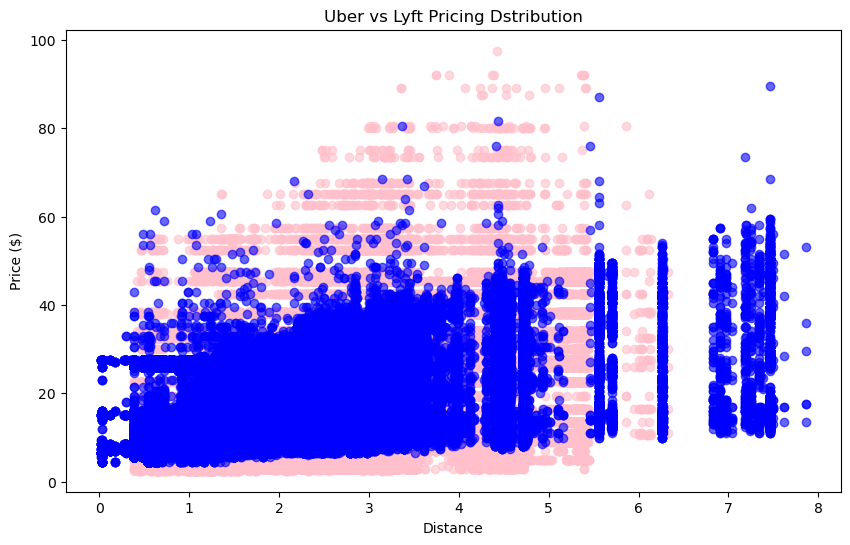

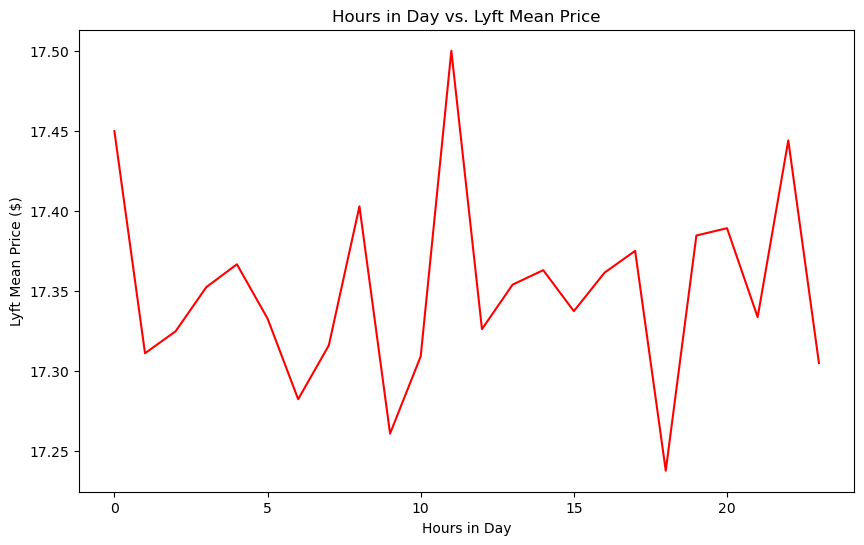

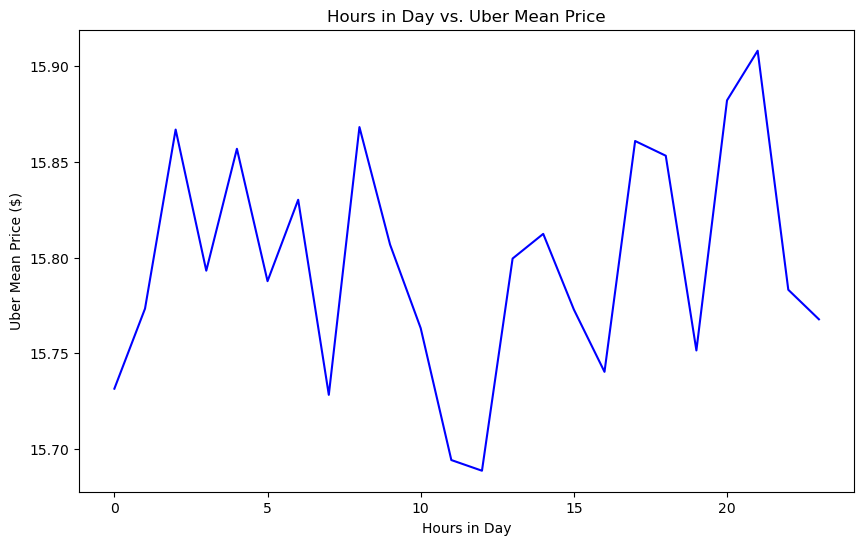

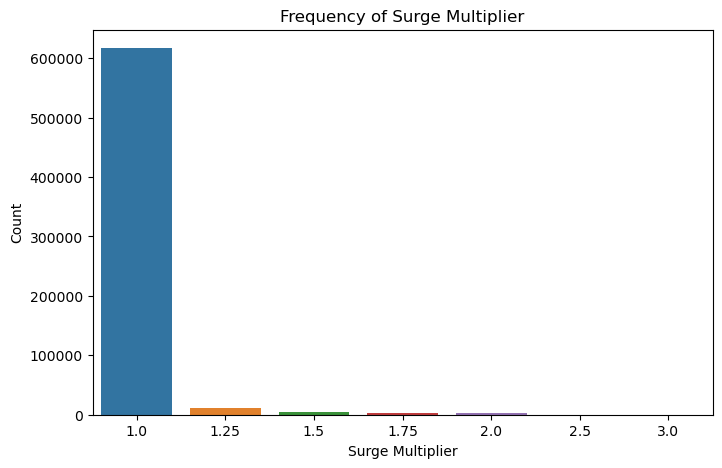

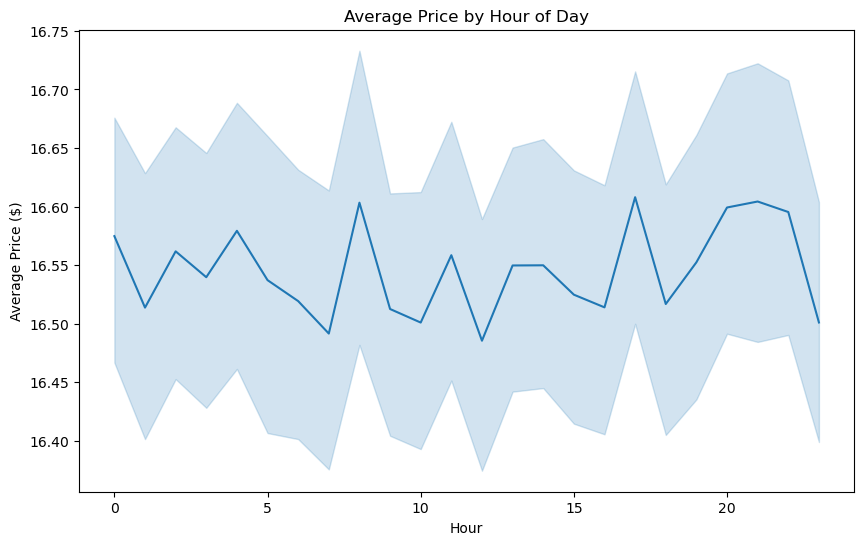

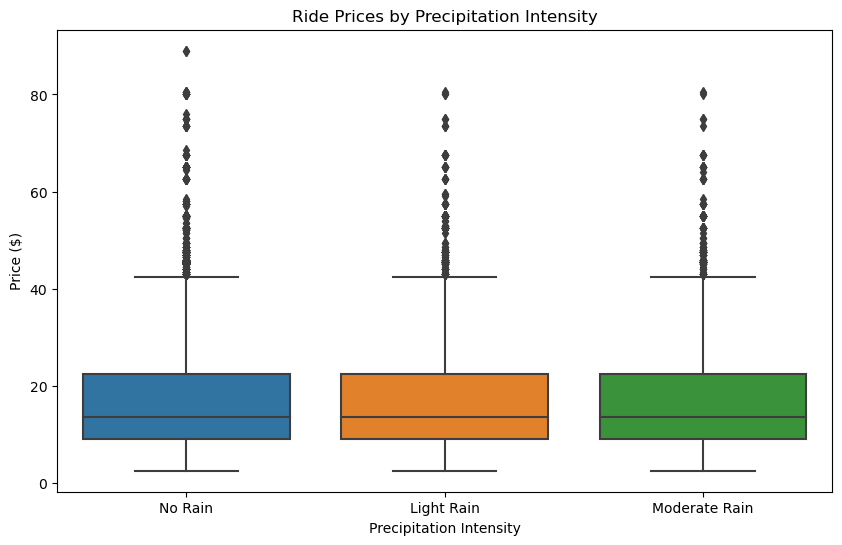

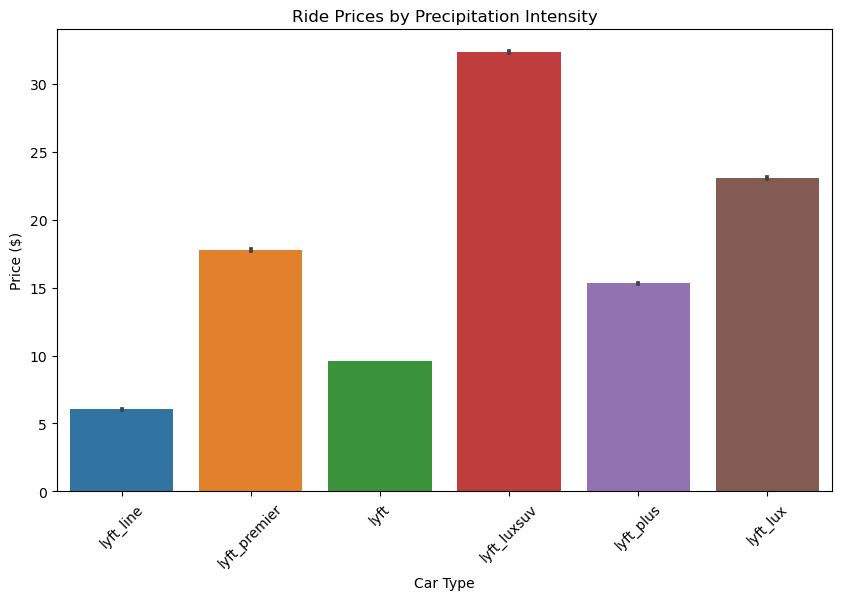

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Lyft vs Uber Price Versus Distance
lyft = clean_data[clean_data['cab_type']  == 'Lyft']
uber = clean_data[clean_data['cab_type'] == 'Uber']

plt.figure(figsize=(10, 6))
plt.scatter(lyft['distance'], lyft['price'], c = 'pink', alpha = 0.6, label = 'Lyft')
plt.scatter(uber['distance'], uber['price'], c = 'blue', alpha = 0.6, label = 'Uber')
plt.title("Uber vs Lyft Pricing Dstribution")
plt.xlabel("Distance")
plt.ylabel("Price ($)")
plt.show()

# Chart 2: Mean Pricing by Hour for Lyft
plt.figure(figsize=(10, 6))
lyft_surge = lyft.groupby('hour')['price'].mean()
plt.plot(lyft_surge.index, lyft_surge.values, c = 'red')
plt.title("Hours in Day vs. Lyft Mean Price")
plt.xlabel("Hours in Day")
plt.ylabel("Lyft Mean Price ($)")
plt.show()

# Chart 3:  Mean Pricing by Hour for Uber
plt.figure(figsize=(10, 6))
uber_surge = uber.groupby('hour')['price'].mean()
plt.plot(uber_surge.index, uber_surge.values, c = 'blue')
plt.title("Hours in Day vs. Uber Mean Price")
plt.xlabel("Hours in Day")
plt.ylabel("Uber Mean Price ($)")
plt.show()

# Chart 4: Surge Pricing Frequency
plt.figure(figsize=(8, 5))
sns.countplot(x='surge_multiplier', data=clean_data)
plt.title("Frequency of Surge Multiplier")
plt.xlabel("Surge Multiplier")
plt.ylabel("Count")
plt.show()

# Chart 5: Average Price by Hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='price', data=clean_data)
plt.title("Average Price by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Price ($)")
plt.show()

# Chart 6: Weather Influence Frequency (Precipitation)
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(clean_data['precipintensity'], bins=[0, 0.05, 0.1, 0.15], labels=["No Rain", "Light Rain", "Moderate Rain"]), y='price', data=clean_data)
plt.title("Ride Prices by Precipitation Intensity")
plt.xlabel("Precipitation Intensity")
plt.ylabel("Price ($)")
plt.show()

# Chart 7: Product Type versus Price
plt.figure(figsize=(10, 6))
sns.barplot(x = 'product_id', y = 'price', data = lyft)
plt.title("Ride Prices by Precipitation Intensity")
plt.xlabel("Car Type")
plt.ylabel("Price ($)")
plt.xticks(rotation = 45)
plt.show()

In [7]:
print("Price Summary:\n", data['price'].describe())
print("\nDistance Summary:\n", data['distance'].describe())
print("\nSurge Multiplier Summary:\n", data['surge_multiplier'].value_counts())
print("\nTemperature Summary:\n", data['temperature'].describe())
print("\nPrecipitation Intensity Summary:\n", data['precipIntensity'].describe())

Price Summary:
 count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

Distance Summary:
 count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

Surge Multiplier Summary:
 1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

Temperature Summary:
 count    693071.000000
mean         39.584388
std           6.726084
min          18.910000
25%          36.450000
50%          40.490000
75%          43.580000
max          57.220000
Name: temperature, dtype: float64

Precipitation Intensity Summary:
 count    693071.000000
mean          0.008922
std           0.026901
min           0.000000

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

One question that caught our interest during the data exploration phase is: “At what times of the day does either Uber or Lyft offer the lowest prices, and is there a consistent pattern that can guide users on when to choose one service over the other?”

To answer this question based on our personal experiences with Lyft and uber, we came up with the following hypothesis
Hypothesis: Lyft offers lower prices during non-peak hours (early morning and late night), while Uber might have higher surge pricing during rush hours, making Lyft the more economical choice at these times.

Inspiration: Based on two line graphs labeled; “Hours in The Day vs Uber Mean Price” and  “Hours in The Day vs Uber Mean Price”, we saw that they peaked in average price during different times of the day. This brought us to hypothesize that there could be an economic way for users to substitute use of one or the other ride app to save money.

To test this hypothesis we did the following:
1. Identify Key Time Intervals (Peak and Non-Peak Hours)
- Based on typical rush hours and late-night/early-morning times, we divided the data into peak (e.g., 7-10 AM, 4-7 PM) and non-peak hours (e.g., midnight through early morning)

2. Compare peaks and troughs between Uber and Lyft
- Analyze the mean price data for both Uber and Lyft by hour of the day to identify the times when each service peaks and dips in pricing

3. Quantify Price Differences Between Services by Hour
- Determine specific hours where the price difference was largest, providing evidence for or against our hypothesis
   
4. Interpret Findings:
- If Lyft had consistently lower prices during non-peak hours and Uber had higher prices during peak hours, it would support our hypothesis
- If no consistent pattern emerged, the data would disprove our hypothesis

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

Overall Comparison Between Lyft and Uber:

- Based on the graphs, we determined that Uber consistently has a lower average price compared to Lyft across almost all hours of the day. 
This observation refutes the part of the hypothesis that suggests Lyft may be cheaper at certain times because Uber's average price remains lower at all times.
- The range of price fluctuation for both services appears similar, though Lyft has some more drastic peaks, which can indicate higher average pricing during certain hours due to increased demand and surge pricing.

Time-of-Day Patterns:

- There is no clear, consistent pattern that one service is significantly cheaper at specific times compared to the other.
- During peak hours 8 AM to 5 PM Lyft's average price fluctuates between 17.25 and 17.50 while Uber fluctuates between 15.70 and 15.90, which shows that throughout the day there isn't much fluctuation of average price.
- The general trend shows that while both Uber and Lyft prices rise and fall during certain hours, Uber’s prices stay lower on average across all times throughout the day.

Surge Pricing and Demand Influence:
- The spikes in Lyft prices might indicate times of higher demand where Lyft experiences surge pricing.
- Uber’s prices are more stable, with variations generally staying within a 0.20 range from 15.70 to 15.90. Lyft shows more pronounced spikes and dips, especially around 10 AM and 9 PM, where prices deviate more substantially.
- the less dramatic spikes in Uber’s prices might suggest that Uber has better price stability or simply lower average surge multipliers in comparison to Lyft.



### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

After our analysis of our data and testing our hypothesis, we found that there is little discrepancy between Lyft and Uber prices during different hours of the day and that in general Uber has a cheaper average price compared to Lyft. So, customers shouldn't switch between apps during peak hours, but instead just stick with Uber for relatively cheaper rates. I found something particularly interesting in our data, which showed that not only was Uber cheaper, but it had less drastic peaks in the average price, which leads us to believe that during peak hours of the day, you will want to use Uber. We also found it interesting that average price fluctuation throughout the day and even at peak hours is relatively small compared to common consumer belief.

We can see this in our average price-by-hour graph which is chart #5. We see that the average price only fluctuates between 16.50 and 16.60, showing only a 10-cent change throughout the day. This is not what we expected as from our personal experience Ubers and Lyfts are generally more pricey when buying them during peak hours.

The implication of this is that ride-sharing apps like Uber and Lyft are not using time to determine pricing and are most likely using other factors like the demand of drivers or hot-spot classification to determine pricing.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

Data Limitations and Bias:
This dataset only covers Uber and Lyft rides logged in Boston for a specific time period. This limitation potentially may not capture the broader pricing trends across different cities or seasons throughout the year. Therefore, potentially leading to biased conclusions on the pricing of Lyft vs Uber. Also, in our findings, relying solely on average prices by hour could potentially oversimplify the complexities of rideshare pricing. Leaving out many other influential factors such as popular events, traffic, or weather, could result in misleading recommendations of when to use Uber vs Lyft for transportation.
The primary stakeholders are rideshare users, rideshare companies (Uber and Lyft), and policy makers.

Impact on others from ethical issues in our work/findings:
Rideshare Users: Users are directly impacted, as they may rely on such analyses to make cost-effective choices that could greatly impact their livelihoods. Misleading information could lead them to make ineffective decisions which would cost them more money.

Rideshare Companies: Uber and Lyft could be affected by conclusions that suggest one service is consistently more economical, potentially influencing market dynamics and user behavior. This could impact their business models, pricing algorithms, and even reputational factors if users feel one service is unfairly priced.

Policy Makers: Rideshare pricing often intersects with transportation policy and consumer rights. Regulatory agencies could utilize findings that misinterpret pricing trends which would lead to unnecessary fines on rideshare companies or implementation of “fair pricing” sanctions on these rideshare companies.

Solution to this issue:
- Analyze a more extensive dataset covering multiple cities and times of the year, providing a more comprehensive picture and minimize regional or seasonal biases in conclusions.
- Clearly communicate the limitations and potential biases of the data and analysis in the conclusions/findings. Being transparent about the assumptions made and the narrow scope of the data in the analysis would ensure that stakeholders are aware of the limitations and can make informed decisions based on this context. We could also emphasize that this analysis is based on historical data from years ago and may not fully reflect real-time prices.
- Instead of drawing broad conclusions, our analysis could incorporate contextual factors (weather conditions; event schedules; weekday vs. weekend patterns).


Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

There were many informative features of the data set including, price, surge_multiplier, distance, cab_type, and hour of day. There were also a lot of non-informative features such as pressure, humidity, wind speed, moon phase, etc. We believe there is also some data that we need to collect that would help us in our research. For example, information about the consumer could help us identify certain traits within consumer data that correspond to ride time, ride price, ride distance, etc. Some great features to have would be consumer rating, amount of rides, and Lyft/Uber points. On the flip side, another helpful piece of data that we could collect would be driver data like driver rating, amount of rides driven, and specific comments made about the driver by costumers. Both of these data sets would allow us to make better predictions and give us more insight into the driving factors of ride-share data.

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. Be sure to add your partner to the submission as well.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.

In [17]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->

